## Tire Friction Analysis

### Learning Objectives
- Use real-world data to calulate velocity, acceleration and curvature
- Apply Newtonian mechanics to estimate friction coefficients
- Build and improve a model for the physics involved
- Compare physics-based prediction with engineering realities

## Introduction
What makes a Formula 1 car stick to the road while cornering at incredible speeds, that would send a regular car flying off the track? Is it the tires? The drivers skill? Maybe something else?

In this project, we will dive into the into the high-speed world of Formula 1 racing. Not as a spectator, but as a data scientist and a physicist. Using real telemetry data from the 2025 British Grand Prix, we will analyze how some of the world's best drivers navigate Corner 15 at Silverstone, one of the fastest and most demanding corners in the sport.

You will calculate how fast these cars go, how tightly they turn, and how much grip their tires need to generate to avoid slipping off the track. Along the way, you'll build a physics-based model of tire grip from the ground up, starting with Newtonian mechanics and working step-by-step toward a more complete understanding.

This project is not just about crunching numbers; it's about understanding the fundamental physics that allows these cars to corner at such high speeds. You will start with a simple model based on Newton's laws of motion, calculating the necessary friction coefficient for cornering. To understand how these cars defy the limits of ordinary driving, you will learn how aerodynamics fundamentally changes the game. And by building a simple model of how downforce affects tire grip, you will create a more accurate and physics-informed picture of what allows an F1 car to corner at such high speeds.

This is not just a data exercise, but an expedition through model-building, scientific reasoning, and applied physics — all wrapped in the thrill of motorsport.


![British Grand Prix Circuit with Corners](Racing_track.png)

## Import data

In the first part of the project, we will use the data of Lando Norris' car during lap 49. This was the fastest lap of the fastest driver at the 2025 British Grand Prix. 

The data is stored in a CSV file named `NOR.csv`. Once loaded, you'll find a dictionary with two keys: `time` and `distance`. The `time` key contains a list of timestamps for each data point, and the `distance` key contains a list of distances traveled by the car at each timestamp.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Racing_data/NOR.csv")

# Convert dataframe to dict of numpy arrays
Norris_data = df.to_dict("list")
for key in Norris_data:
    Norris_data[key] = np.array(Norris_data[key])

## 1) Finding velocities

In this section, you will calculate the velocity of Lando Norris’ car throughout the entire lap. This is the first step in analyzing how the car’s speed varies across different segments of the track.

Our main focus will be corner 15, a high-speed right-hander. As shown in the image above, this corner is flanked by long straights on both sides, meaning drivers enter and exit at very high speeds. That makes it an ideal place to study tire friction, since the car must generate significant grip to stay on the track without slowing down much. Understanding the car's velocity through this section is crucial to our mission of calculating the friction coefficient required for cornering at high speeds.

### 1a) Circular motion

To begin our analysis, we will approximate corner 15 as a half-circle. While this is a simplification, it allows us to apply the physics of circular motion to better understand how the car maintains its trajectory through the turn.

When an object moves along a circular path, it experiences centripetal acceleration, which always points toward the center of the circle. The formula for this acceleration is:
$$ a_c = \frac{v^2}{r} $$

To produce this inward acceleration, a net force must act on the object, directed toward the center. This force is called the centripetal force, and in the case of a car on a flat track, it is provided entirely by static friction between the tires and the road:
$$ F_f = F_c = m a_c = m \frac{v^2}{r} $$
In other words, friction is not opposing the car's motion, but rather causes the change in direction by pulling the car inward as it moves forward.

Draw a free body diagram of the car in corner 15. Include the velocity $v$ and the friction force $F_f$ in your diagram.

*Place your free body diagram here:*

![Free body diagram of the car in turn 15](Free_Body_Diagram.png)

### 1b) Velocity function

Since the data provided, only contains the distance traveled by the car and the corresponding time, we want to extend the data to include the velocity of the car at each point in time. We will calculate the velocity by using numerical differentiation on the data. The velocity at each point can be approximated using the formula:
$$ v_i = \frac{d_i - d_{i-1}}{t_i - t_{i-1}} $$
where $v_i$ is the velocity at time $t_i$, $d_i$ is the distance at time $t_i$, and $d_{i-1}$ is the distance at the previous time step $t_{i-1}$.

Create a function `find_velocity(distances, times)` that takes the distance and time arrays as input and returns a new array with the calculated velocities at each time step.

Then, use this function to calculate the velocity for the driver and add it to the original data dictionary under a new key called `"velocity"`.


*Note: $v_0$ is undefined, so you will need to handle that case appropriately.*

In [27]:
def find_velocity(distances: np.ndarray, times: np.ndarray) -> np.ndarray:
    """
    Velocities are calculated as the time derivative of the distance data.

    Parameters:
    -----------
    distances (np.ndarray): Array of distances covered by the racer at different time intervals.
    times (np.ndarray): Array of time intervals corresponding to the distance data.

    Returns:
    -----------
    velocities (np.ndarray): Array of calculated velocities for the racer.
    """
    velocities = np.zeros(len(distances))  # Initialize velocities array

    for i in range(1, len(distances)):
        velocities[i] = (distances[i] - distances[i - 1]) / (times[i] - times[i - 1])

    return velocities

distance = Norris_data["distance"]
time = Norris_data["time"]

Norris_data["velocity"] = find_velocity(distance, time) #Create a new key in the dictionary with the calculated velocities
print(Norris_data.keys())

dict_keys(['time', 'distance', 'velocity'])


### 1c) Corner 15

Now that we have the velocity data, we can focus on corner 15. We will extract the relevant data points for corner 15 and analyze the velocities at those points.

In this subsection, you will need to plot the velocity of the car throughout corner 15. This will help us visualize how the car's speed changes as it navigates the turn.

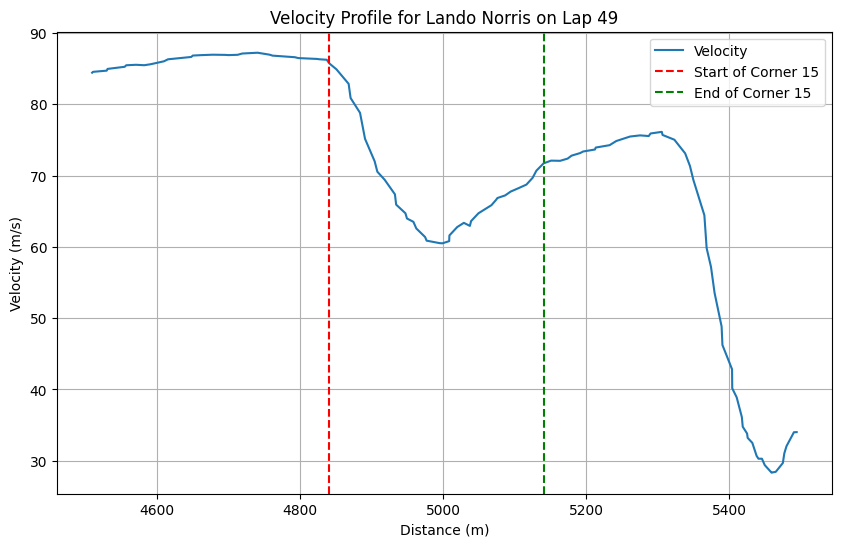

In [28]:
start_of_corner_15 = 4840#m 
end_of_corner_15 = 5150#m 

distances = Norris_data["distance"]#m
velocities = Norris_data["velocity"]#m/s


start_idx = np.where(distances >= start_of_corner_15)[0][0]
end_idx = np.where(distances <= end_of_corner_15)[0][-1]

## Optional to use if you want to see the velocity profile before and after the corner as well
into_corner_15 = np.where(distances >= 4500)[0][0] # Some distance before the corner
out_of_corner_15 = np.where(distances <= 5500)[0][-1] # Some distance after the corner


plt.figure(figsize=(10, 6))
plt.plot(distances[into_corner_15:out_of_corner_15], 
         velocities[into_corner_15:out_of_corner_15], 
         label=f"Velocity")

plt.axvline(x=distances[start_idx], 
            color='red', linestyle='--', label='Start of Corner 15')

plt.axvline(x=distances[end_idx], 
            color='green', linestyle='--', label='End of Corner 15')



plt.title(f"Velocity Profile for Lando Norris on Lap 49")
plt.xlabel("Distance (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()


### 1d) Average velocity

Before we get into the tire friction, we want to approximate some average velocity for corner 15. 

Using the indices `start_idx` and `end_idx` that we found in the previous step, calculate the average velocity of Lando Norris' car in corner 15.

In [29]:
average_velocity = np.mean(velocities[start_idx:end_idx])
print(f"Average velocity in corner 15: {average_velocity:.2f} m/s")

Average velocity in corner 15: 68.10 m/s


## 2) Tire friction

Now that we have the velocity of the car, we can soon start our mission of finding the friction coefficients of the tires.

To do this, we need to simplify the real-world scenario with a few reasonable assumptions:

1. Corner 15 is a perfect half circle. This means the car maintains a constant radius of curvature throughout the turn, which allows us to apply the standard formula for centripetal acceleration and force
2. The driver is driving at the maximum speed possible through the corner, which means that the car is at the limit of the tire's grip.
3. The track is flat, which means that there is no banking in the corner.     

With these assumptions, we can move forward and calculate the friction coefficient $μ$ by relating the friction force to the centripetal force.

### 2a) Finding $μ$

In this section, we want to find a formula for the friction coefficient $μ$.

The first assumption we made, allows us to use the formula for centripetal acceleration $a_c = \frac{v^2}{r}$, in order to find the friction coefficient $μ$.
Since the driver is driving at maximum velocity, at which the wheels can handle without slipping, we can say that the centripetal force, $F_c = ma _c$, is equal to the friction force, $F_f = μ N$. 

Find an expression for the friction coefficient $μ$, dependent on the average velocity, the radius and the mass.


Solution:

$$
μ = \frac{v^2}{r g}
$$

### 2b) Create a function to calculate the friction coefficient

As you can see from the formula above, we need to know the velocity $v$ through the corner, the gravitational acceleration $g$, and the radius $r$ of the corner to calculate the friction coefficient $μ$.

We have the average velocity readily available, and luckily for us, the gravitational acceleration was established by the third General Conference on Weights and Measures in 1901 to be $g = 9.81 \, \text{m/s}^2$ [Standard gravity](https://en.wikipedia.org/wiki/Standard_gravity).

So first you will need to find the radius of the corner. Take the formula for the circumference of a circle, $C = 2 \pi r$, together with the fact that corner 15 is a half circle of length $L$, to find the radius $r$ of the corner. The length is the distance between the start and end of corner 15, which was given in the previous section.

Then create a function `mu(v,r)` that takes in the average velocity through the corner, the radius of the corner, and returns the friction coefficient $μ$.


In [30]:
g = 9.81 # Acceleration due to gravity in m/s^2
length_of_corner = end_of_corner_15 - start_of_corner_15 # Length of the half circle in meters
radius_of_corner = length_of_corner / np.pi # Radius of the half circle in meters

def mu(v: float, r: float) -> float:
    """Calculate the coefficient of friction required to maintain a given velocity in a circular path.
    
    Parameters:
    ----------
    v (float): Velocity in m/s.
    r (float): Radius of the circular path in meters.

    Returns:
    -------
    μ (float): Coefficient of friction required.

    """
    return v**2 / (g * r)



### 2c) Calculate the friction coefficient

Using the average velocity through corner 15 and the radius of the corner, calculate the friction coefficient $μ$.

In [31]:
coefficient_of_friction = mu(average_velocity, radius_of_corner)

print(f"Coefficient of friction for corner 15: {coefficient_of_friction:.2f}")

Coefficient of friction for corner 15: 4.79


You might notice that the friction coefficient is quite high. We understand that F1 cars are designed to have high grip, but this value seems unrealistic. Let us proceed to the next section to find out why.

## 3) Improving the model

In the previous section, we estimated the friction coefficient for corner 15. However, the value we obtained is likely unrealistically high. That tells us our model is missing something important.

There is one thing about racing cars that we cannot ignore, and that is the downforce. Maybe the most remembered feature of the F1 cars is the huge rear wing, which is used to create downforce. The downforce is a force that pushes the car down onto the track, increasing the grip of the tires and allowing the car to go faster through corners.

In other words, the car isn't relying solely on its weight to grip the road, it is also using aerodynamic pressure.
In this section, we will extend our model to account for downforce and see how it affects the calculated friction coefficient. This will give us a more realistic and physics-informed estimate of tire grip at high speed.

### 3a) Downforce

Earlier, we assumed that the friction force alone was responsible for providing the centripetal force needed to keep the car in a circular path. However, racing cars, especially F1 cars, generate significant downforce due to their aerodynamic design. This downforce increases the normal force, and therefore increases the maximum frictional force the tires can produce without slipping.

So the normal force $N$ is no longer just the weight of the car ($mg$), but also includes the downforce force $F_d$.
$$N = mg + F_D$$

where $F_D$ is the aerodynamic downforce force. A simplified model for the downforce force is:
$$F_d = C_D v²$$

where $C_D$ is an effective downforce coefficient, and $v$ is the velocity.

With the redefinition of the normal force, find a new expression for the friction coefficient $μ$ that includes the downforce.



Solution:
$$F_c = F_f$$

$$F_f = μN = μ(mg + C_D v²)$$

$$mv²/r = μ(mg + C_D v²)$$

$$μ = mv²/(r(mg + C_D v²))$$

### 3b) Create a function to calculate the new friction coefficient

Now it is time to create an improved function for the friction coefficient that takes into account the downforce.

Let us redefine the `mu(v,r,C_D,m)` function to include the downforce term. The new function should include the downforce coefficient $C_D$, the mass of the car $m$, the radius of the corner $r$ and the average velocity $v$.

The mass of the car, including the racer, is approximately 800 kg, and the downforce coefficient $C_D$ is approximately 3.2, although it can vary between cars.


In [32]:
def mu(v: float, r: float, C_D: float = 3.2, m: float = 800) -> float:
    """Calculate the coefficient of friction required to maintain a given velocity in a circular path.
    
    Parameters:
    ----------
    v (float): Velocity in m/s.
    r (float): Radius of the circular path in meters.
    C_D (float): Drag coefficient (default is 3.2).
    m (float): Mass of the car in kg (default is 800).
    

    Returns:
    -------
    μ (float): Coefficient of friction required.
    """
    return m * v**2 / (r * (m * g + C_D * v**2))

### 3c) Calculate the new friction coefficient

Now that we have updated the `mu` function to include the downforce, you can apply it and see if the new friction coefficient is more realistic.

In [33]:
coefficient_of_friction = mu(average_velocity, radius_of_corner)

print(f"Coefficient of friction for corner 15: {coefficient_of_friction:.2f}")

Coefficient of friction for corner 15: 1.66


Most likely, you will have found that the new friction coefficient is much lower than the previous one. This is because the downforce increases the grip of the tires, allowing the car to go faster through corners without slipping.

Try googling the average friction coefficient for F1 tires, and see if your result is in the same ballpark.

## 4) Friction coefficient of all the racers

Now that we have a function to calculate the friction coefficient, we can apply it to all the racers that managed to qualify for the final races of the British Grand Prix 2025.

Below, we have imported the data for all the racers. This dataset is a nested dictionary, where each key is the name of a racer, and for each racer, there is a dictionary with the keys `distance` and `time`, which contain the distance traveled and the time taken at each point in time, respectively.

In [34]:
driver_codes = ['VER', 'TSU', 'HUL', 'PIA', 'NOR', 'SAI', 'OCO', 'ALO', 'LEC', 'BEA', 'HAM', 'ALB', 'STR', 'RUS', 'GAS']
Racing_data = {}

for code in driver_codes:
    df = pd.read_csv(f"Racing_data/{code}.csv") # Load the CSV file for each driver
    Racing_data[code] = { #create a dictionary for each driver
        "time": df["time"].to_numpy(),
        "distance": df["distance"].to_numpy()
    }

print(Racing_data.keys()) #each key is a driver code, and the value is a dictionary with time and distance arrays

dict_keys(['VER', 'TSU', 'HUL', 'PIA', 'NOR', 'SAI', 'OCO', 'ALO', 'LEC', 'BEA', 'HAM', 'ALB', 'STR', 'RUS', 'GAS'])


For those of us who are not familiar with the abbreviations of the racer names, here is a table with the full names of the racers:

|Racer Name | Racer Key |
|------------|-------|
|Lando Norris| NOR   |
|Lance Stroll| STR   |
|Nico Hulkenberg| HUL   |
|George Russell| RUS   |
|Charles Leclerc| LEC   |
|Oliver Bearman| BEA   |
|Oscar Piastri| PIA   |
|Max Verstappen| VER   |
|Lewis Hamilton| HAM   |
|Pierre Gasly| GAS   |
|Fernando Alonso| ALO   |
|Carlos Sainz| SAI   |
|Alex Albon| ALB   |
|Esteban Ocon| OCO   |

### 4a) Find all the velocities
Now that we have the data, we can use the `find_velocity(data)` function we created earlier to find the velocities for all the racers.

In [ ]:

for racer_key in Racing_data.keys():
    distance = Racing_data[racer_key]["distance"]
    time = Racing_data[racer_key]["time"]
    Racing_data[racer_key]["velocity"] = find_velocity(distance, time)  


### 4b) Calculate the average velocities

In this section, we will calculate the average velocities for each racer throughout corner 15. Which racer was the fastest going through corner 15?

In [36]:
for racer_key in Racing_data.keys():
    distances = Racing_data[racer_key]["distance"]
    velocities = Racing_data[racer_key]["velocity"]
    
    start_idx = np.where(distances >= start_of_corner_15)[0][0]
    end_idx = np.where(distances <= end_of_corner_15)[0][-1]
    
    average_velocity = np.mean(velocities[start_idx:end_idx])
    
    print(f"Average velocity in corner 15 for {racer_key}: {average_velocity:.2f} m/s")

    Racing_data[racer_key]["average_velocity"] = average_velocity #Save the average velocity in the racer data

Average velocity in corner 15 for VER: 68.95 m/s
Average velocity in corner 15 for TSU: 66.14 m/s
Average velocity in corner 15 for HUL: 68.69 m/s
Average velocity in corner 15 for PIA: 69.49 m/s
Average velocity in corner 15 for NOR: 68.10 m/s
Average velocity in corner 15 for SAI: 65.62 m/s
Average velocity in corner 15 for OCO: 65.67 m/s
Average velocity in corner 15 for ALO: 67.00 m/s
Average velocity in corner 15 for LEC: 66.38 m/s
Average velocity in corner 15 for BEA: 65.41 m/s
Average velocity in corner 15 for HAM: 69.16 m/s
Average velocity in corner 15 for ALB: 66.54 m/s
Average velocity in corner 15 for STR: 65.57 m/s
Average velocity in corner 15 for RUS: 66.81 m/s
Average velocity in corner 15 for GAS: 65.30 m/s


Solution:
The fastest racer through corner 15 was Oscar Piastri, with an average velocity of 69.49 m/s

### 4b) Calculate the friction coefficients

Now, we have found the average velocities for all the racers to see who was the fastest through corner 15.
The next thing we want to do is to calculate the friction coefficients for all the racers, using the `mu` function we created with the average velocities we just found.

Find the friction coefficients for all the racers, as well as the average and the standard deviation of the friction coefficients between all the racers.

In [37]:
mus = []
for racer_key in Racing_data.keys():
    average_velocity = Racing_data[racer_key]["average_velocity"]
    coefficient_of_friction = mu(average_velocity, radius_of_corner)
    mus.append(coefficient_of_friction)

    print(f"Coefficient of friction for {racer_key}: {coefficient_of_friction:.2f}")

coefficient_of_friction = np.mean(mus)
std_mu = np.std(mus)

print(f"Average coefficient of friction for all racers: {coefficient_of_friction:.2f} ± {std_mu:.2f}")

Coefficient of friction for VER: 1.67
Coefficient of friction for TSU: 1.62
Coefficient of friction for HUL: 1.67
Coefficient of friction for PIA: 1.68
Coefficient of friction for NOR: 1.66
Coefficient of friction for SAI: 1.61
Coefficient of friction for OCO: 1.62
Coefficient of friction for ALO: 1.64
Coefficient of friction for LEC: 1.63
Coefficient of friction for BEA: 1.61
Coefficient of friction for HAM: 1.67
Coefficient of friction for ALB: 1.63
Coefficient of friction for STR: 1.61
Coefficient of friction for RUS: 1.64
Coefficient of friction for GAS: 1.61
Average coefficient of friction for all racers: 1.64 ± 0.02
